# Import libraries

In [6]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt

# Checkered Board

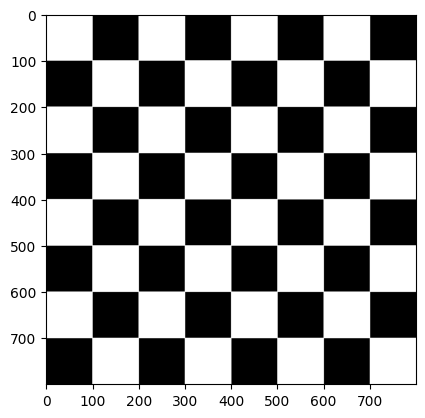

In [2]:
def create_chess_board(W, h, rows, cols):
    """
    Tạo ra một bảng cờ vua với kích thước W x h và số hàng, cột xác định.
    
    Tham số:
    W (int): Chiều rộng của hình ảnh.
    h (int): Chiều cao của hình ảnh.
    rows (int): Số hàng của bảng cờ vua.
    cols (int): Số cột của bảng cờ vua.
    
    Trả về:
    numpy.ndarray: Hình ảnh bảng cờ vua.
    """
    # Tạo một mảng 3 chiều với kích thước W x h x 3 với giá trị 0 (màu đen)
    img = np.zeros((W, h, 3), np.uint8)
    
    # Màu trắng cho các ô cờ
    color = (255, 255, 255)

    # Vẽ các ô cờ
    for i in range(rows):
        for j in range(cols):
            if (i + j) % 2 == 0:
                cv2.rectangle(img, (i * (W // rows), j * (h // cols)), 
                              ((i + 1) * (W // rows), (j + 1) * (h // cols)), color, -1)
    return img

# Hiển thị hình ảnh
plt.imshow(create_chess_board(800, 800, 8, 8))
plt.show()


# Color Corection

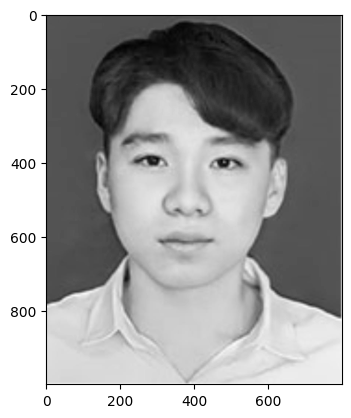

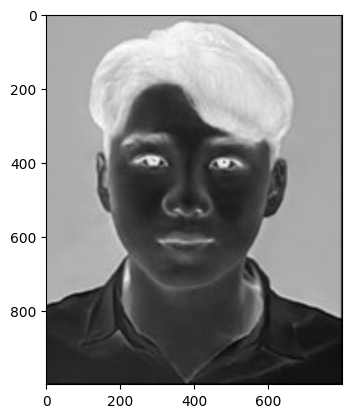

In [18]:
import cv2
import matplotlib.pyplot as plt

def invert_grayscale_image(path):
    """Đọc hình ảnh grayscale từ đường dẫn và đảo ngược màu sắc."""
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    return img

def color_orection(img):
    """Đảo ngược màu sắc của hình ảnh."""
    return 255 - img
def display_image(img, cmap="gray"):
    plt.imshow(img, cmap=cmap)
    plt.show()

path = "./img/download.png"
display_image(invert_grayscale_image(path))
display_image(color_orection(invert_grayscale_image(path)))


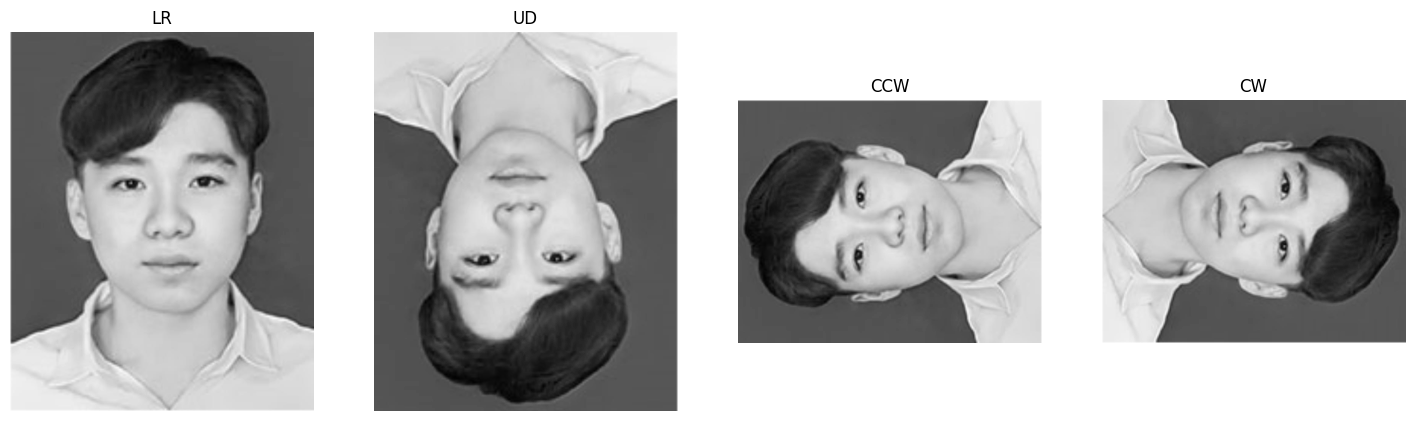

In [26]:
def rotate_image(img, direction):
    """
    Xoay ảnh theo các hướng LR (Left-Right), UD (Up-Down), CCW (Counterclockwise), CW (Clockwise).
    
    Tham số:
    img (numpy.ndarray): Hình ảnh đầu vào.
    direction (str): Hướng xoay, có thể là 'LR', 'UD', 'CCW', hoặc 'CW'.
    
    Trả về:
    numpy.ndarray: Hình ảnh sau khi xoay.
    """
    if direction == 'LR':
        return np.fliplr(img)
    elif direction == 'UD':
        return np.flipud(img)
    elif direction == 'CCW':
        return np.transpose(np.fliplr(img))
    elif direction == 'CW':
        return np.transpose(np.flipud(img))
    else:
        raise ValueError("Hướng xoay không hợp lệ. Chọn một trong các giá trị: 'LR', 'UD', 'CCW', 'CW'.")

path = './img/download.png'
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

rotated_img_lr = rotate_image(img, 'LR')  # Xoay trái phải
rotated_img_ud = rotate_image(img, 'UD')  # Xoay trên dưới
rotated_img_ccw = rotate_image(img, 'CCW')  # Xoay ngược chiều kim đồng hồ
rotated_img_cw = rotate_image(img, 'CW')  # Xoay theo chiều kim đồng hồ

rotated_images = [rotated_img_lr, rotated_img_ud, rotated_img_ccw, rotated_img_cw]
titles = ['LR', 'UD', 'CCW', 'CW']

plt.figure(figsize=(18, 6))

for i, (img, title) in enumerate(zip(rotated_images, titles)):
    plt.subplot(1, 4, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.show()